In [ ]:
"""
Copyright (c) <2023>, <John Meshreki>
All rights reserved.

john.meshreki@gmail.com
"""

In [ ]:
import os
import sys
# Get the current directory (where the notebook is located)
import sys
#sys.path.append(os.path.abspath('../../csetools'))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import matplotlib.pylab as pylab


In [ ]:
import datetime
import errno
from config import path_to_output

def create_dir(date_today, date_now):
    """Creates a directory."""
    path_dir_w_time = f'{path_to_output}/{date_today}/{date_now}'
    try:
        os.makedirs(path_dir_w_time)
    except OSError as exc:
        if exc.errno != errno.EEXIST:
            raise
        pass
    return path_dir_w_time

def timestamp():
    """Generates date and time strings."""
    today = datetime.date.today()
    date_today = today.strftime("%Y_%m_%d")
    now = datetime.datetime.now()
    date_now = now.strftime("%Y_%m_%d_%H_%M_%S")
    return date_today, date_now


In [ ]:
def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks
    
def plot_hist(r, g, b, title=''):
    #r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    plt.hist(r.ravel(),100,alpha = 0.5, lw=3, color='r', label='r')
    plt.hist(g.ravel(),100,alpha = 0.5, lw=3, color='g', label='g')
    plt.hist(b.ravel(),100,alpha = 0.5, lw=3, color='b', label='b')
    plt.xlabel('pixel value', size=20), plt.ylabel('frequency', size=20)
    plt.title(title, size=20)
    
def print_array_statistics(arr):
    """
    Prints statistics of a given array or image.
    
    Parameters:
        arr (numpy.ndarray): The input array or image.
    """
    # Check if the input is a NumPy array
    if not isinstance(arr, np.ndarray):
        print("The input is not a NumPy array.")
        return
    
    # Determine if the array has 3 channels (assuming the last dimension refers to channels)
    if len(arr.shape) == 3 and arr.shape[2] == 3:
        channels = ['Red', 'Green', 'Blue']
        for idx, channel in enumerate(channels):
            print(f"Statistics for {channel} channel:")
            print_channel_statistics(arr[:, :, idx])
            print("\n")
    else:
        print("Array Statistics:")
        print_channel_statistics(arr)
        
def print_channel_statistics(channel):
    """Prints statistics for a given channel or grayscale image."""
    min_val = np.min(channel)
    max_val = np.max(channel)
    mean_val = np.mean(channel)
    std_dev = np.std(channel)
    shape = channel.shape
    dtype = channel.dtype
    
    # Print statistics
    print(f"  Shape: {shape}")
    print(f"  Data Type: {dtype}")
    print(f"  Min Value: {min_val}")
    print(f"  Max Value: {max_val}")
    print(f"  Mean: {mean_val}")
    print(f"  Standard Deviation: {std_dev}") 

# Testing a resolution target

In [ ]:
from config import path_to_images

sample_image_path = f'{path_to_images}/res_target_1.png' 

# Load a sample image to get its aspect ratio
image_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
# Check if the image is indeed 16-bit
if image_gray is not None:
    print(f"Image dtype: {image_gray.dtype}")
    print(f"Max pixel value (should be greater than 255 for 16-bit): {image_gray.max()}")
else:
    print("Failed to read the image")
    
image = image_gray
# Apply FFT
fft = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft)

# Calculate magnitude and phase
magnitude = np.abs(fft_shifted)
phase = np.angle(fft_shifted)

# Reconstruct the image
reconstructed_fft = np.fft.ifftshift(magnitude * np.exp(1j * phase))
reconstructed_image = np.fft.ifft2(reconstructed_fft)
reconstructed_image = np.abs(reconstructed_image)

# Plotting the images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(np.log(1 + magnitude), cmap='gray')
ax[0, 1].set_title("Magnitude Spectrum")
ax[0, 1].axis('off')

ax[1, 0].imshow(phase, cmap='gray')
ax[1, 0].set_title("Phase Spectrum")
ax[1, 0].axis('off')

ax[1, 1].imshow(reconstructed_image, cmap='gray')
ax[1, 1].set_title("Reconstructed Image")
ax[1, 1].axis('off')

# Histogram of the magnitude spectrum
ax[0, 2].hist(magnitude.ravel(), bins=30, color='black')
ax[0, 2].set_title("Frequency Histogram")
ax[0, 2].set_xlabel("Frequency Magnitude")
ax[0, 2].set_ylabel("Count")

plt.tight_layout()

plt.show()

In [ ]:
from config import path_to_images
sample_image_path = f'{path_to_images}/res_target_2.png' 

# Load a sample image to get its aspect ratio
image_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
# Check if the image is indeed 16-bit
if image_gray is not None:
    print(f"Image dtype: {image_gray.dtype}")
    print(f"Max pixel value (should be greater than 255 for 16-bit): {image_gray.max()}")
else:
    print("Failed to read the image")
    
image = image_gray
# Apply FFT
fft = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft)

# Calculate magnitude and phase
magnitude = np.abs(fft_shifted)
phase = np.angle(fft_shifted)

# Reconstruct the image
reconstructed_fft = np.fft.ifftshift(magnitude * np.exp(1j * phase))
reconstructed_image = np.fft.ifft2(reconstructed_fft)
reconstructed_image = np.abs(reconstructed_image)

# Plotting the images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(np.log(1 + magnitude), cmap='gray')
ax[0, 1].set_title("Magnitude Spectrum")
ax[0, 1].axis('off')

ax[1, 0].imshow(phase, cmap='gray')
ax[1, 0].set_title("Phase Spectrum")
ax[1, 0].axis('off')

ax[1, 1].imshow(reconstructed_image, cmap='gray')
ax[1, 1].set_title("Reconstructed Image")
ax[1, 1].axis('off')

# Histogram of the magnitude spectrum
ax[0, 2].hist(magnitude.ravel(), bins=30, color='black')
ax[0, 2].set_title("Frequency Histogram")
ax[0, 2].set_xlabel("Frequency Magnitude")
ax[0, 2].set_ylabel("Count")

plt.tight_layout()

plt.show()

In [ ]:
from config import path_to_images
sample_image_path = f'{path_to_images}/res_target_3.png' 

# Load a sample image to get its aspect ratio
image_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
# Check if the image is indeed 16-bit
if image_gray is not None:
    print(f"Image dtype: {image_gray.dtype}")
    print(f"Max pixel value (should be greater than 255 for 16-bit): {image_gray.max()}")
else:
    print("Failed to read the image")
    
image = image_gray
# Apply FFT
fft = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft)

# Calculate magnitude and phase
magnitude = np.abs(fft_shifted)
phase = np.angle(fft_shifted)

# Reconstruct the image
reconstructed_fft = np.fft.ifftshift(magnitude * np.exp(1j * phase))
reconstructed_image = np.fft.ifft2(reconstructed_fft)
reconstructed_image = np.abs(reconstructed_image)

# Plotting the images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(np.log(1 + magnitude), cmap='gray')
ax[0, 1].set_title("Magnitude Spectrum")
ax[0, 1].axis('off')

ax[1, 0].imshow(phase, cmap='gray')
ax[1, 0].set_title("Phase Spectrum")
ax[1, 0].axis('off')

ax[1, 1].imshow(reconstructed_image, cmap='gray')
ax[1, 1].set_title("Reconstructed Image")
ax[1, 1].axis('off')

# Histogram of the magnitude spectrum
ax[0, 2].hist(magnitude.ravel(), bins=30, color='black')
ax[0, 2].set_title("Frequency Histogram")
ax[0, 2].set_xlabel("Frequency Magnitude")
ax[0, 2].set_ylabel("Count")

plt.tight_layout()

plt.show()

In [ ]:
from config import path_to_images
sample_image_path = f'{path_to_images}/res_target_4.png' 

# Load a sample image to get its aspect ratio
image_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
# Check if the image is indeed 16-bit
if image_gray is not None:
    print(f"Image dtype: {image_gray.dtype}")
    print(f"Max pixel value (should be greater than 255 for 16-bit): {image_gray.max()}")
else:
    print("Failed to read the image")
    
image = image_gray
# Apply FFT
fft = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft)

# Calculate magnitude and phase
magnitude = np.abs(fft_shifted)
phase = np.angle(fft_shifted)

# Reconstruct the image
reconstructed_fft = np.fft.ifftshift(magnitude * np.exp(1j * phase))
reconstructed_image = np.fft.ifft2(reconstructed_fft)
reconstructed_image = np.abs(reconstructed_image)

# Plotting the images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(np.log(1 + magnitude), cmap='gray')
ax[0, 1].set_title("Magnitude Spectrum")
ax[0, 1].axis('off')

ax[1, 0].imshow(phase, cmap='gray')
ax[1, 0].set_title("Phase Spectrum")
ax[1, 0].axis('off')

ax[1, 1].imshow(reconstructed_image, cmap='gray')
ax[1, 1].set_title("Reconstructed Image")
ax[1, 1].axis('off')

# Histogram of the magnitude spectrum
ax[0, 2].hist(magnitude.ravel(), bins=30, color='black')
ax[0, 2].set_title("Frequency Histogram")
ax[0, 2].set_xlabel("Frequency Magnitude")
ax[0, 2].set_ylabel("Count")

plt.tight_layout()

plt.show()

# Visualize Tian's data grid

In [ ]:
from config import path_to_tian_thumbnail


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the dimensions of the grid
grid_rows = 15
grid_columns = 19

# Calculate the center position
center_row = 8
center_column = 10

# Calculate the index of the center position
center_index = (center_row - 1) * grid_columns + center_column

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize to suit the aspect ratio

# Load a sample image to get its aspect ratio
sample_image_path = f'{path_to_tian_thumbnail}/Iled_1.png'  # Replace with the actual image path
sample_image = Image.open(sample_image_path)
sample_aspect_ratio = sample_image.width / sample_image.height

# Loop through the grid coordinates
for index in range(1, grid_rows * grid_columns + 1):
    # Calculate the adjusted index
    adjusted_index = index + 147 - center_index
    if adjusted_index <= 0 or adjusted_index > grid_rows * grid_columns:
        continue  # Skip indexes that fall outside the grid

    # Construct the image filename using the adjusted index
    image_path = f'{path_to_tian_thumbnail}/Iled_{adjusted_index}.png'  # Adjust pattern if necessary

    try:
        # Load the image
        image = Image.open(image_path)

        # Calculate the position and size of the image within the grid cell
        x_position = (index - 1) % grid_columns
        y_position = grid_rows - 1 - (index - 1) // grid_columns  # Inverted y-coordinate

        cell_width = 1
        cell_height = cell_width / sample_aspect_ratio

        # Display the image in the grid cell
        ax.imshow(image, extent=(x_position, x_position + cell_width, y_position, y_position + cell_height))

        # Add grid coordinates as text
        ax.text(x_position + 0.05, y_position + 0.05, f'{adjusted_index}', color='white', fontsize=8)

    except FileNotFoundError:
        print(f"Image not found for index {adjusted_index}")

# Set labels and title
ax.set_xticks(np.arange(0, grid_columns))
ax.set_yticks(np.arange(0, grid_rows))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Images on Grid')

# Display the grid of images
plt.grid(True)

# Show the plot
plt.show()



In [ ]:
from config import path_to_tian_images
sample_image_path = f'{path_to_tian_images}Iled_147.png' 

In [ ]:
# Load a sample image to get its aspect ratio
image_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
# Check if the image is indeed 16-bit
if image_gray is not None:
    print(f"Image dtype: {image_gray.dtype}")
    print(f"Max pixel value (should be greater than 255 for 16-bit): {image_gray.max()}")
else:
    print("Failed to read the image")
    
plt.imshow(image_gray, cmap='gray')
plt.grid(False)
plt.show()

In [ ]:
print_array_statistics(image_gray)

In [ ]:
#! identify {sample_image_path}

# 2D FFT

In [ ]:
image = image_gray
# Apply FFT
fft = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft)

# Calculate magnitude and phase
magnitude = np.abs(fft_shifted)
phase = np.angle(fft_shifted)

# Reconstruct the image
reconstructed_fft = np.fft.ifftshift(magnitude * np.exp(1j * phase))
reconstructed_image = np.fft.ifft2(reconstructed_fft)
reconstructed_image = np.abs(reconstructed_image)

# Plotting the images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(np.log(1 + magnitude), cmap='gray')
ax[0, 1].set_title("Magnitude Spectrum")
ax[0, 1].axis('off')

ax[1, 0].imshow(phase, cmap='gray')
ax[1, 0].set_title("Phase Spectrum")
ax[1, 0].axis('off')

ax[1, 1].imshow(reconstructed_image, cmap='gray')
ax[1, 1].set_title("Reconstructed Image")
ax[1, 1].axis('off')

# Histogram of the magnitude spectrum
ax[0, 2].hist(magnitude.ravel(), bins=30, color='black')
ax[0, 2].set_title("Frequency Histogram")
ax[0, 2].set_xlabel("Frequency Magnitude")
ax[0, 2].set_ylabel("Count")

plt.tight_layout()

plt.show()

# Seperate 2D image into 1D and apply FFT

In [ ]:
image = image_gray
# # Apply FFT
# fft = np.fft.fft2(image)
# fft_shifted = np.fft.fftshift(fft)

# # Calculate magnitude
# magnitude = np.abs(fft_shifted)

# Apply 1D FFT along rows and columns
fft_rows = np.fft.fft(image, axis=0)
fft_columns = np.fft.fft(image, axis=1)
magnitude_rows = np.abs(np.fft.fftshift(fft_rows))
magnitude_columns = np.abs(np.fft.fftshift(fft_columns))

# Plotting
fig, ax = plt.subplots(3, 3, figsize=(16, 8))

# Original image
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

# Magnitude spectrum (FFT along rows)
ax[0, 1].imshow(np.log(1 + magnitude_rows), cmap='gray')
ax[0, 1].set_title("Magnitude Spectrum (FFT along rows)")
ax[0, 1].axis('off')

# Magnitude spectrum (FFT along columns)
ax[0, 2].imshow(np.log(1 + magnitude_columns), cmap='gray')
ax[0, 2].set_title("Magnitude Spectrum (FFT along columns)")
ax[0, 2].axis('off')

# Histogram of pixels intensities
ax[1, 0].hist(image.ravel(), bins=100, color='black')
ax[1, 0].set_title("Pixel intensity of image")
ax[1, 0].set_xlabel("Pixel value")
ax[1, 0].set_ylabel("Count")

# Histograms in spatial domain
#ax[1, 1].hist(image.sum(axis=0), bins=100, color='black')  # Sum along rows
ax[1, 1].hist(image.sum(axis=0), bins=100, color='black')  # Sum along rows
ax[1, 1].set_title("Histogram of sum Rows in Spatial Domain")
ax[1, 1].set_xlabel("Intensity of sum Rows")
ax[1, 1].set_ylabel("Count")

ax[1, 2].hist(image.sum(axis=1), bins=100, color='black')  # Sum along columns
ax[1, 2].set_title("Histogram of sum Columns in Spatial Domain")
ax[1, 2].set_xlabel("Intensity of sum Columns")
ax[1, 2].set_ylabel("Count")

# Histograms in Fourier domain
ax[2, 1].hist(magnitude_rows.sum(axis=0), bins=30, color='black')  # Sum along rows
ax[2, 1].set_title("Histogram of sum Rows in Fourier Domain")
ax[2, 1].set_xlabel("Frequency Magnitude")
ax[2, 1].set_ylabel("Count")

ax[2, 2].hist(magnitude_columns.sum(axis=1), bins=30, color='black')  # Sum along columns
ax[2, 2].set_title("Histogram of sum Columns in Fourier Domain")
ax[2, 2].set_xlabel("Frequency Magnitude")
ax[2, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Creating video of individual gratings
original code snippets by Stephen Gruppetta

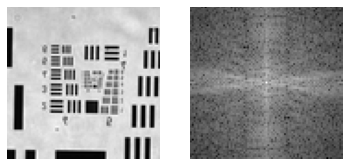

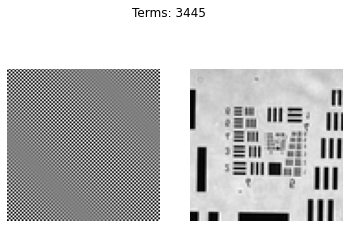

In [3]:
# fourier_synthesis.py

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from config import path_to_output, path_to_tian_thumbnail
import datetime
import errno

def create_dir(date_today, date_now):
    """Creates a directory."""
    path_dir_w_time = f'{path_to_output}/{date_today}/{date_now}'
    try:
        os.makedirs(path_dir_w_time)
    except OSError as exc:
        if exc.errno != errno.EEXIST:
            raise
        pass
    return path_dir_w_time

def timestamp():
    """Generates date and time strings."""
    today = datetime.date.today()
    date_today = today.strftime("%Y_%m_%d")
    now = datetime.datetime.now()
    date_now = now.strftime("%Y_%m_%d_%H_%M_%S")
    return date_today, date_now


#image_filename = "Elizabeth_Tower_London.jpg"
image_filename = f'{path_to_tian_thumbnail}/Iled_147.png'

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)

def save_frame_as_image(fig, filename):
    """Save a Matplotlib figure as an image without borders or axes."""
    canvas = FigureCanvas(fig)
    canvas.draw()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(canvas.get_width_height()[::-1] + (3,))
    cv2.imwrite(filename, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))    

date_today, date_now = timestamp()
output_dir = create_dir(date_today, date_now)    

# # Read and process image
# image = plt.imread(image_filename)
# image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

# Load a sample image to get its aspect ratio
image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)

# Array dimensions (array is square) and centre pixel
# Use smallest of the dimensions and ensure it's odd
array_size = min(image.shape) - 1 + min(image.shape) % 2

# Crop image so it's a square image
image = image[:array_size, :array_size]
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)

# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap("gray")

ft = calculate_2dft(image)

# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0

# All steps are displayed until display_all_until value
display_all_until = 200
# After this, skip which steps to display using the
# display_step value
display_step = 10
# Work out index of next step to display
next_display = display_all_until + display_step

# Define the figure size and DPI
figsize = (8, 4)
dpi = 100

# Calculate the frame size for the video
frame_width = int(figsize[0] * dpi)
frame_height = int(figsize[1] * dpi)

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_out = cv2.VideoWriter(output_dir + '/fourier_synthesis.avi', fourcc, 5.0, (frame_width, frame_height))


# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating

        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        # # Don't display every step
        # if idx < display_all_until or idx == next_display:
        #     if idx > display_all_until:
        #         next_display += display_step
        #         # Accelerate animation the further the
        #         # iteration runs by increasing
        #         # display_step
        #         display_step += 10
        #     display_plots(rec_grating, rec_image, idx)

        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                display_step += 10

            fig = plt.figure(figsize=figsize, dpi=dpi)
        plt.subplot(121)
        plt.imshow(rec_grating)
        plt.axis("off")
        plt.subplot(122)
        plt.imshow(rec_image)
        plt.axis("off")
        plt.suptitle(f"Terms: {idx}")

        # Save frame
        frame_filename = f"temp_frame_{idx}.png"
        save_frame_as_image(fig, frame_filename)
        frame = cv2.imread(frame_filename)
        video_out.write(frame)
        os.remove(frame_filename)  # Remove the frame image file
        plt.close(fig)

# Release the video writer
video_out.release()